In [4]:
import scipy.io
import numpy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from multiprocessing import Pool
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns

# Lineplots first!
## Odd is Accuracy Even is Speed

## 0 1 are sudden

In [2]:
def lineplots(data, block, first, last):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))

    for i in range(first,last):
        plt.plot(traj['x'][0][i][0], traj['y'][0][i][0])


In [3]:
interact(lineplots, data = widgets.ToggleButtons(options = range(1000, 1060)), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1),
        first = widgets.IntSlider(max = 63, min = 0, value = 0, step = 1), last = widgets.IntSlider(max = 64, min = 1, value = 1, step = 1))

interactive(children=(ToggleButtons(description='data', options=(1000, 1001, 1002, 1003, 1004, 1005, 1006, 100…

<function __main__.lineplots(data, block, first, last)>

## Error Vs Time plots

Divide Trajectories by 5. Calculate mean and standard deviation of difference between ideal and actual trajectories (both divided by 5) for all 64 trajectories in a block. 
From the movement time, calculate how long it took to finish each of these 5 trajectories. Calculate mean and standard deviation across 64 trials. 

This might as well just be equal to the mean and standard deviation of the **number** of points in each of those five quantiles for all trajectories.



# Error Calculation
Takes in a trajectory loaded from the mat file and calculates error by comparing minimum distance from x and y coordinates of the actual trajectory to the ideal trajectory

In [3]:
#square_coord = scipy.io.loadmat('data/pilot/pilot_1/squares/coordinates/squares3.mat')
#traj = scipy.io.loadmat('data/pilot/pilot_1/actual_trajectories/trajectories3.mat')
#def calc_error(traj, square_coord):
# The version above uses square coordinates
def calc_error(traj):    
    error = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]

        xline = numpy.linspace(0, end_pointx, 500)
        yline = numpy.linspace(0, end_pointy, 500)

        for i in range(len(trajx)):
            xdist = min(numpy.absolute(xline-trajx[i]))
            ydist = min(numpy.absolute(yline-trajy[i]))
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        error.append(traj_dist)
    return error
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [4]:
#traj['x'][0][0][0][-1]

In [5]:
#calc_error(traj, square_coord)

Participant 1 Gradual Change Accuracy emphasis

Participant 2 Sudden change Accuracy emphasis

Participant 3 Gradual change Speed emphasis

# Time quintiles:
X axis is cummulative sum of the number of samples in the trajectory, averaged across all trajectories. 
Y axis is the mean of error in that time quantile, averaged across all trajectories


In [6]:
def errorvstime(data, block, num_trajectories):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/data{data}/ideal_trajectories/trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)[:num_trajectories]
    #error = xdiff**2+ydiff**2
    #print (error)
    error_means = numpy.zeros((num_trajectories, 5))
    for i in range(num_trajectories):
        n = len(error[i])
        for j in range(5):
            error_means[i, j] = numpy.mean(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
#            error_means[i, j] = numpy.median(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
         #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((num_trajectories, 5))

    for i in range(num_trajectories):
        n = len(error[i])
        for j in range(5):
            time_means[i, j] = len(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = stat.sem(time_means, axis = 0), yerr = stat.sem(error_means, axis = 0))
    plt.ylabel('Error')
    plt.xlabel('Time')
    plt.xlim(0, 100)
    plt.ylim(-20, 70)
    return times, numpy.mean(error_means, axis = 0)

Calculate error vs time for each block collapsed across participants.

C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


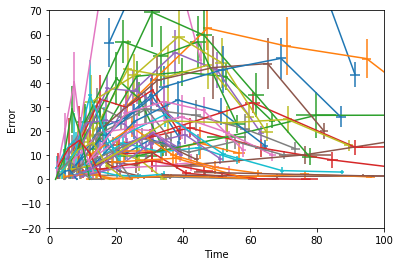

In [7]:
times = numpy.zeros((60, 5))
errors = numpy.zeros((60, 5))
for i in range(1000, 1059):
    temp = errorvstime(i, 11, 32)
    times[i-1000] = temp[0]
    errors[i-1000] = temp[1] 
    #print (i)

In [5]:
errors = pd.read_csv('Curvature_Errors.csv')
errors['Condition'] = errors['Rotation'] + '_' + errors['Emphasis']

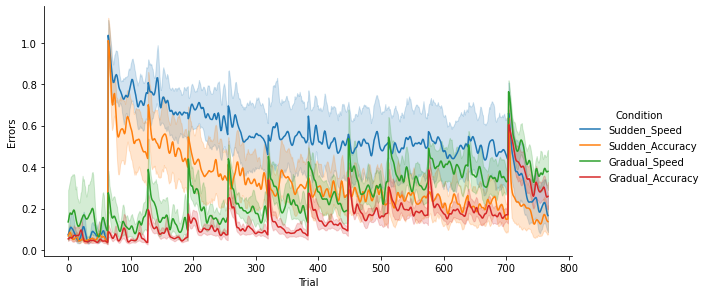

In [14]:
sns.relplot(x = 'Trial', y = 'Errors', hue = 'Condition', data = errors, height = 4, aspect = 2, kind = 'line')

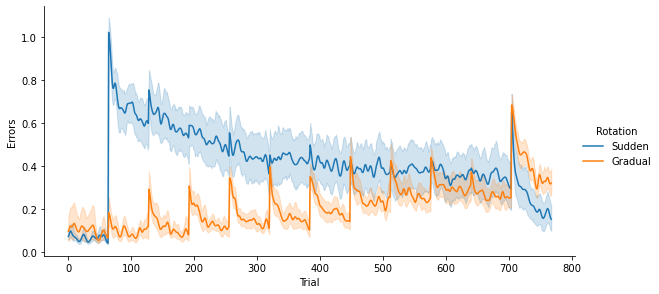

In [15]:
sns.relplot(x = 'Trial', y = 'Errors', hue = 'Rotation', data = errors, height = 4, aspect = 2, kind = 'line')

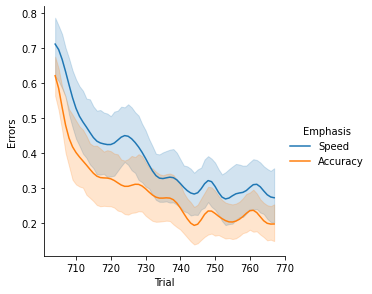

In [69]:
sns.relplot(x = 'Trial', y = 'Errors', hue = 'Emphasis', data = errors[errors['Block'] == 11], height = 4, aspect = 1, kind = 'line')

In [38]:
block_wise = errors.groupby(['Participant_Id', 'Block', 'Rotation', 'Emphasis', 'Condition']).mean().reset_index()

In [37]:
model = smf.ols('Errors~Rotation*Emphasis', data = block_wise[block_wise['Block'] == 11]).fit()
aov = sm.stats.anova_lm(model, typ = 2)
aov

,sum_sq,df,F,PR(>F)
Rotation,0.352494,1.0,12.892114,0.000695
Emphasis,0.125905,1.0,4.604867,0.036230
Rotation:Emphasis,0.000479,1.0,0.017534,0.895129
Residual,1.531140,56.0,NaN,NaN


In [52]:
block_wise

,Participant_Id,Block,Rotation,Emphasis,Condition,Unnamed: 0,Trial,Errors
0,0,0,Sudden,Speed,Sudden_Speed,31.5,31.5,0.062969
1,0,1,Sudden,Speed,Sudden_Speed,95.5,95.5,0.940013
2,0,2,Sudden,Speed,Sudden_Speed,159.5,159.5,0.928455
3,0,3,Sudden,Speed,Sudden_Speed,223.5,223.5,0.846367
4,0,4,Sudden,Speed,Sudden_Speed,287.5,287.5,0.970076
...,...,...,...,...,...,...,...,...
715,59,7,Gradual,Accuracy,Gradual_Accuracy,45791.5,479.5,0.227281
716,59,8,Gradual,Accuracy,Gradual_Accuracy,45855.5,543.5,0.241795
717,59,9,Gradual,Accuracy,Gradual_Accuracy,45919.5,607.5,0.162014
718,59,10,Gradual,Accuracy,Gradual_Accuracy,45983.5,671.5,0.179522


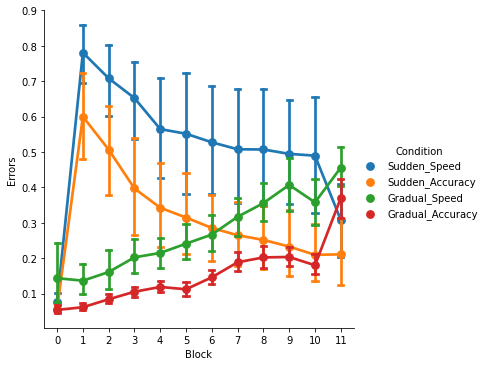

In [54]:
sns.catplot(x = 'Block', y = 'Errors', hue = 'Condition', data = block_wise, kind = 'point', capsize = 0.2)

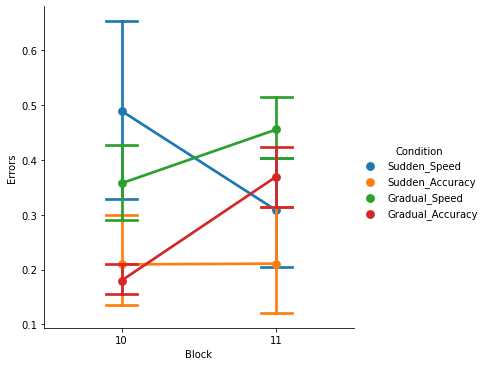

In [76]:
sns.catplot(x = 'Block', y = 'Errors', hue = 'Condition', 
            data = block_wise.loc[(block_wise['Block'] == 10) | (block_wise['Block'] == 11)], kind = 'point', capsize = 0.2)
